In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fire = pd.read_csv("forestfires.csv")
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
#size_category is the target variable.
fire["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [5]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
objlist = fire.select_dtypes(include = "object").columns
print(objlist)

Index(['month', 'day', 'size_category'], dtype='object')


In [7]:
fire.shape

(517, 31)

In [8]:
fire.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
fire.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [10]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
fire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [12]:
fire.T

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31
wind,6.7,0.9,1.3,4.0,1.8,5.4,3.1,2.2,5.4,4.0,...,3.6,3.6,7.6,5.4,2.7,2.7,5.8,6.7,4.0,4.5
rain,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import seaborn as sns

<AxesSubplot:>

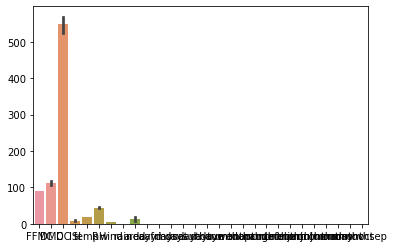

In [14]:
sns.barplot(data=fire)

(array([[517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [268., 209.,  40.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 86.,   3.,  15.,  25.,  27.,  91., 219.,  51.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [517.,   0.,

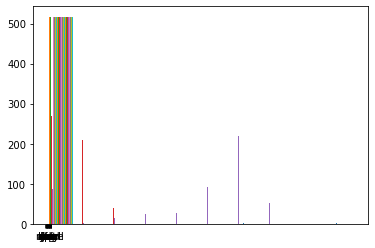

In [15]:
plt.hist(fire)

(array([378.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

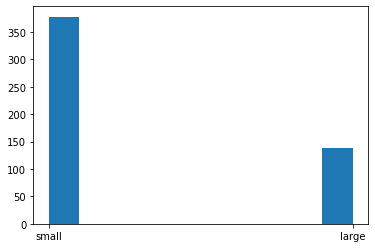

In [16]:
plt.hist(fire['size_category'])

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

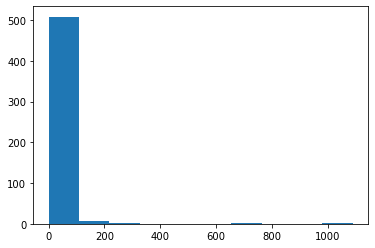

In [17]:
plt.hist(fire['area'])

(array([ 21.,  96., 130., 104.,  63.,  40.,  31.,  20.,   7.,   5.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <BarContainer object of 10 artists>)

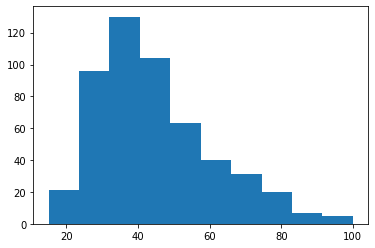

In [18]:
plt.hist(fire['RH'])

(array([ 18.,  11.,  31.,  47.,  92., 127.,  99.,  55.,  24.,  13.]),
 array([ 2.2 ,  5.31,  8.42, 11.53, 14.64, 17.75, 20.86, 23.97, 27.08,
        30.19, 33.3 ]),
 <BarContainer object of 10 artists>)

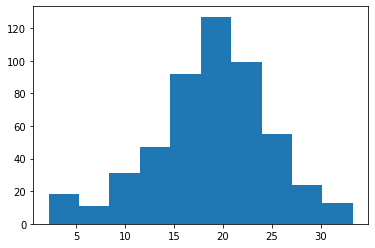

In [19]:
plt.hist(fire['temp'])

(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 437.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <BarContainer object of 10 artists>)

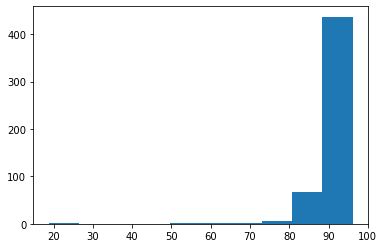

In [20]:
plt.hist(fire['FFMC'])

(array([ 67.,  21.,   6.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <BarContainer object of 10 artists>)

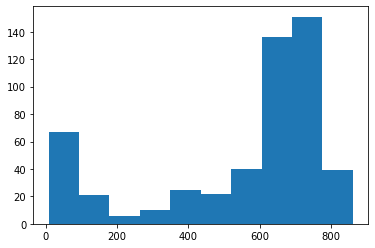

In [21]:
plt.hist(fire['DC'])

(array([ 83., 312.,  93.,  26.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  5.61, 11.22, 16.83, 22.44, 28.05, 33.66, 39.27, 44.88,
        50.49, 56.1 ]),
 <BarContainer object of 10 artists>)

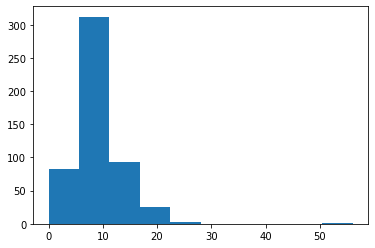

In [22]:
plt.hist(fire['ISI'])

(array([ 67.,  21.,   6.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <BarContainer object of 10 artists>)

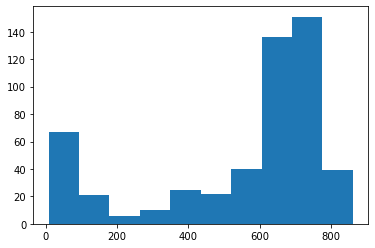

In [23]:
plt.hist(fire['DC'])

(array([ 63.,  63.,  49., 114., 113.,  42.,  25.,  23.,   9.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <BarContainer object of 10 artists>)

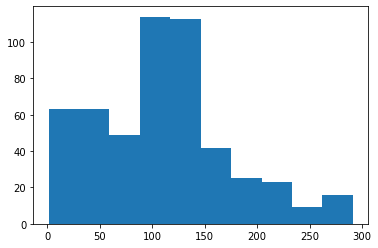

In [24]:
plt.hist(fire['DMC'])

In [25]:
from sklearn.preprocessing  import LabelEncoder

In [26]:
le =  LabelEncoder()

In [29]:
fire['size_category']=le.fit_transform(fire['size_category'].astype(object))

In [30]:
fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
def norm_data(i):
    x =((i- i.min())/(i.max()-i.min()))
    return x
normalized_data =norm_data(fire.iloc[:,2:-1])

In [32]:
normalized_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X=normalized_data
y=fire['size_category']

In [34]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [38]:
n_features =X.shape[1]
n_features

28

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((361, 28), (156, 28), (361,), (156,))

In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow

In [41]:
optmizer =RMSprop(0.001)#0.01 is a learning rate
model =keras.Sequential([
    keras.layers.Dense(12,input_dim =28,activation='relu'),
    keras.layers.Dense(50,activation ='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer =optmizer,loss= 'binary_crossentropy',metrics =['accuracy'])

In [42]:
seed_val =42
import random
random.seed(seed_val)
tensorflow.random.set_seed(seed_val)

In [43]:
model.fit(X_train,y_train,epochs =10)

Epoch 1/10
12/12 [==============================] - 1s 3ms/step - loss: 0.6410 - accuracy: 0.7036
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.7285
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.7285
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7285
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.5847 - accuracy: 0.7285
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5850 - accuracy: 0.7285
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7285
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.7285
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.7285
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7285


In [44]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7372


[0.5782626271247864, 0.7371794581413269]

In [51]:
#about 73% of forest area is burnt in the forest fires

In [45]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [46]:
y_pred[25]

array([0.748669], dtype=float32)

In [49]:
y_test[192]

0

In [50]:
y_pred

array([[0.71475744],
       [0.72514254],
       [0.72790796],
       [0.7216754 ],
       [0.75200325],
       [0.7156791 ],
       [0.72806895],
       [0.7297576 ],
       [0.73061806],
       [0.7414223 ],
       [0.74715   ],
       [0.72130716],
       [0.73518264],
       [0.7476079 ],
       [0.7345115 ],
       [0.7272001 ],
       [0.73330677],
       [0.73015416],
       [0.7480055 ],
       [0.74896675],
       [0.7155563 ],
       [0.73997754],
       [0.71407   ],
       [0.72640616],
       [0.7213299 ],
       [0.748669  ],
       [0.7244199 ],
       [0.7468352 ],
       [0.7050622 ],
       [0.7317421 ],
       [0.7388475 ],
       [0.7326683 ],
       [0.702288  ],
       [0.72994065],
       [0.7391736 ],
       [0.74506   ],
       [0.74313754],
       [0.7183996 ],
       [0.7295241 ],
       [0.72851956],
       [0.74785584],
       [0.72676784],
       [0.7274954 ],
       [0.74110824],
       [0.7324167 ],
       [0.74295306],
       [0.7110384 ],
       [0.739